In [4]:
from datetime import date
from src.security_symbol import SecurityTicker
from src.market import Market
from src.portfolio import Portfolio
from src.analysis import Analysis, Benchmark, Metric
from src.rebalance import Rebalance
from src.strategy import StopGainAndLoss
from src.backtest import BackTest
from src.factor.sales_growth import SalesGrowthFactor
from src.fund_universe import SECTOR_ETF_TICKER, SECTOR_ETF_LIPPER

In [5]:
start_date = date.fromisoformat("2013-01-01")
end_date = date.fromisoformat("2023-10-31")
security_universe = SECTOR_ETF_TICKER

market = Market(security_universe, start_date, end_date)

In [6]:
### Long factor
long_factor = SalesGrowthFactor(security_universe, start_date, end_date, "long")
long_portfolio = Portfolio(100.0, start_date, end_date)
long_factor.set_portfolio_at_start(long_portfolio)

blacklist = []
strategy = StopGainAndLoss(long_portfolio, blacklist)
strategy.set_limit(1, 1)
rebalance = Rebalance(30, long_portfolio, long_factor, blacklist)

backtest = BackTest(long_portfolio, strategy, market, rebalance)
backtest.run()

# print(long_portfolio.value_book)

rebalance on 2013-02-14: [('Consumer Staples(RSPS)', -0.011), ('Energy(ENFR)', -0.001), ('Utilities(RSPU)', 0.002)]
rebalance on 2013-04-01: [('Consumer Staples(RSPS)', -0.342), ('Utilities(RSPU)', -0.006), ('Energy(ENFR)', 0.025), ('Financials(RSPF)', 0.323)]
rebalance on 2013-05-13: [('Utilities(RSPU)', -0.333), ('Financials(RSPF)', -0.333), ('Energy(ENFR)', -0.324), ('Communication Services(RSPC)', 0.323), ('Real Estate(RSPR)', 0.333), ('Consumer Discretionary(RSPD)', 0.333)]
rebalance on 2013-06-25: [('Real Estate(RSPR)', -0.337), ('Consumer Discretionary(RSPD)', 0.007), ('Communication Services(RSPC)', 0.007), ('Energy(ENFR)', 0.323)]
rebalance on 2013-08-07: [('Energy(ENFR)', -0.314), ('Consumer Discretionary(RSPD)', -0.019), ('Communication Services(RSPC)', 0.009), ('Health Care(RSPH)', 0.323)]
rebalance on 2013-09-19: [('Communication Services(RSPC)', -0.326), ('Consumer Discretionary(RSPD)', -0.016), ('Health Care(RSPH)', 0.009), ('Energy(ENFR)', 0.333)]
rebalance on 2013-10-3

In [7]:
### Short factor
short_factor = SalesGrowthFactor(security_universe, start_date, end_date, "short")
short_portfolio = Portfolio(100.0, start_date, end_date)
short_factor.set_portfolio_at_start(short_portfolio)

blacklist = []
strategy = StopGainAndLoss(short_portfolio, blacklist)
strategy.set_limit(1, 1)
rebalance = Rebalance(30, short_portfolio, short_factor, blacklist)

backtest = BackTest(short_portfolio, strategy, market, rebalance)
backtest.run()

# print(short_portfolio.value_book)

rebalance on 2013-02-14: [('Industrials(RSPN)', -0.018), ('Information Technology(RSPT)', -0.004), ('Communication Services(RSPC)', 0.012)]
rebalance on 2013-04-01: [('Industrials(RSPN)', -0.002), ('Information Technology(RSPT)', -0.001), ('Communication Services(RSPC)', 0.002)]
rebalance on 2013-05-13: [('Communication Services(RSPC)', -0.323), ('Information Technology(RSPT)', -0.009), ('Industrials(RSPN)', 0.008), ('Health Care(RSPH)', 0.323)]
rebalance on 2013-06-25: [('Information Technology(RSPT)', -0.002), ('Health Care(RSPH)', 0.0), ('Industrials(RSPN)', 0.002)]
rebalance on 2013-08-07: [('Information Technology(RSPT)', -0.335), ('Health Care(RSPH)', -0.323), ('Industrials(RSPN)', -0.01), ('Materials(RSPM)', 0.333), ('Consumer Staples(RSPS)', 0.333)]
rebalance on 2013-09-19: [('Materials(RSPM)', -0.007), ('Industrials(RSPN)', -0.005), ('Consumer Staples(RSPS)', 0.012)]
rebalance on 2013-10-31: [('Consumer Staples(RSPS)', -0.334), ('Industrials(RSPN)', -0.322), ('Materials(RSPM)'

portfolio annulized return: 0.09580478518834368
portfolio annulized return relative to benchmark: -0.006446247002650285
information ratio: -2.5687898496617836e-05


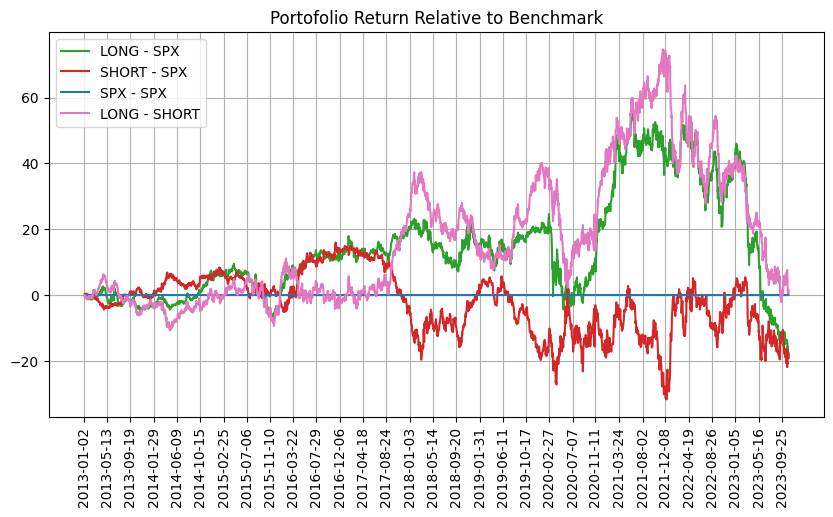

In [8]:
### plot
benchmark = Benchmark(
    SecurityTicker("^SPX", "index"), start_date, end_date
).get_performance()

metric = Metric(long_portfolio, benchmark)
print(f"portfolio annulized return: {metric.annualized_return()}")
print(
    f"portfolio annulized return relative to benchmark: {metric.annualized_return_relative_to_benchmark()}"
)
print(f"information ratio: {metric.information_ratio()}")

analysis = Analysis(
    long_portfolio,
    short_portfolio,
    benchmark,
    "SPX",
)
analysis.draw()
